<a href="https://colab.research.google.com/github/Sampath844/MLAssignment29-07-2024/blob/main/MachineLearningKNNassignment3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV file
file_path = 'train.csv'  # Update the file path as needed
df = pd.read_csv(file_path)

# Fill NaN values with empty strings
df['Prompt'] = df['Prompt'].fillna('')
df['Answer'] = df['Answer'].fillna('')

# Inspect the first few rows of the text data
print("First few rows of 'Prompt' column:")
print(df['Prompt'].head())
print("\nFirst few rows of 'Answer' column:")
print(df['Answer'].head())

# Initialize the TF-IDF vectorizer for 'Prompt' column
tfidf_vectorizer_prompt = TfidfVectorizer()
tfidf_prompt_matrix = tfidf_vectorizer_prompt.fit_transform(df['Prompt'])

# Check if the TF-IDF matrix is non-empty
if tfidf_prompt_matrix.shape[1] == 0:
    print("The TF-IDF matrix for 'Prompt' column is empty.")
else:
    tfidf_prompt_vectors = pd.DataFrame(tfidf_prompt_matrix.toarray(), columns=tfidf_vectorizer_prompt.get_feature_names_out())
    print('TF-IDF Vectors for Prompts:')
    print(tfidf_prompt_vectors.head())

# Initialize the TF-IDF vectorizer for 'Answer' column
tfidf_vectorizer_answer = TfidfVectorizer()
tfidf_answer_matrix = tfidf_vectorizer_answer.fit_transform(df['Answer'])

# Check if the TF-IDF matrix is non-empty
if tfidf_answer_matrix.shape[1] == 0:
    print("The TF-IDF matrix for 'Answer' column is empty.")
else:
    tfidf_answer_vectors = pd.DataFrame(tfidf_answer_matrix.toarray(), columns=tfidf_vectorizer_answer.get_feature_names_out())
    print('\nTF-IDF Vectors for Answers:')
    print(tfidf_answer_vectors.head())

# Optionally, save the TF-IDF vectors to CSV files
tfidf_prompt_vectors.to_csv('tfidf_prompt_vectors.csv', index=False)
tfidf_answer_vectors.to_csv('tfidf_answer_vectors.csv', index=False)


First few rows of 'Prompt' column:
0    [INST] You are an AI assistant that helps peop...
1    [INST] You are an AI assistant. You will be gi...
2    [INST] You are an AI assistant. You will be gi...
3    [INST] You are an AI assistant. User will you ...
4    [INST] You are an AI assistant. User will you ...
Name: Prompt, dtype: object

First few rows of 'Answer' column:
0    Step-by-step reasoning process:\n1. Randy spen...
1    What is the temperature at which hypothermia b...
2    Answer: c) No. \n\nThe hypothesis is false bec...
3                                           Prismatoid
4                                               Case B
Name: Answer, dtype: object
TF-IDF Vectors for Prompts:
    00  000  0000  0008  000â  001  002  0024  003  004  ...  風が吹く街  \
0  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    0.0   
1  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    0.0   
2  0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  ...    0.0   
3  0.0  0.0

KeyboardInterrupt: 

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [5]:
data = pd.read_csv('train.csv')
data['text'] = data['Prompt'] + " " + data["Answer"]
data = data[['text','Target']]
data.fillna(" ",inplace=True)

In [6]:
#vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['Target']

In [7]:
X_dense = X.toarray()

In [9]:
df_features = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
df_features['Target'] = y.values
df_features.to_csv('features.csv', index=False)

In [16]:
df_features.mean(axis = 0) #mean of the data
#standard deviation
df_features.std(axis = 0)


,0
00,0.012982
000,0.022348
01,0.012208
05,0.009932
07,0.009513
...,...
والتجارة,0.007732
که,0.013373
उस,0.011398
የንስትር,0.007738


In [22]:
df1 = df_features.iloc[0]

TypeError: 'numpy.float64' object is not iterable

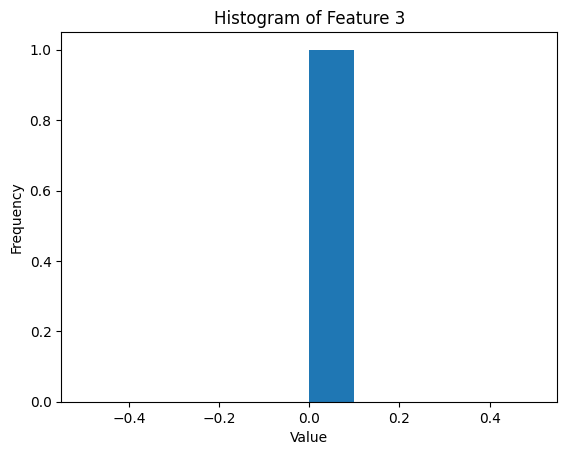

In [28]:
#A2
plt.hist(df_features.iloc[0].iloc[2]) #3rd feature of the xl sheet
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 3')
plt.show()


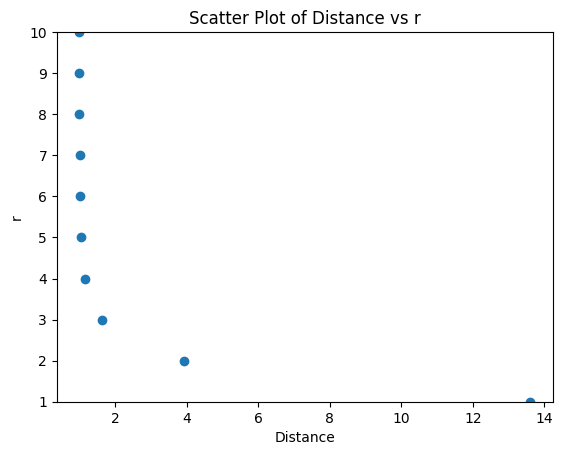

In [39]:
#A3
df1 = df_features.iloc[0]
df2 = df_features.iloc[1]
r = 1
dist = 0
newl = []
newl2 = []
for j in range (10):
  for i in range(len(df1)):
    dist += abs(((df1.iloc[i] - df2.iloc[i])**r))
  dist = dist**(1/r)
  newl2.append(r)
  r+=1
  newl.append(dist)
plt.scatter(x=newl,y=newl2)
plt.xlabel('Distance')
plt.ylabel('r')
plt.title('Scatter Plot of Distance vs r')
plt.ylim(1, 10)
plt.show()






In [58]:
#A4
from sklearn.model_selection import train_test_split
X = vectorizer.fit_transform(data['text']).toarray()
Y = data['Target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
neigh.score(X_test,Y_test) #accuracy of KNN


0.4403834631515878

In [68]:
y_pred = neigh.predict(X_test)


In [72]:
from sklearn.metrics import confusion_matrix,classification_report #A9
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      4764
           1       0.18      0.75      0.29       243

    accuracy                           0.82      5007
   macro avg       0.58      0.79      0.59      5007
weighted avg       0.95      0.82      0.87      5007

[[3926  838]
 [  61  182]]


In [74]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
for i in range (1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  if(newneigh.score(X_test,Y_test) > neigh.score(X_test,Y_test)):
    print(f"{i}th neighbor is greater")

1th neighbor is greater
2th neighbor is greater
4th neighbor is greater


Text(0.5, 1.0, 'Accuracy vs Number of Neighbors')

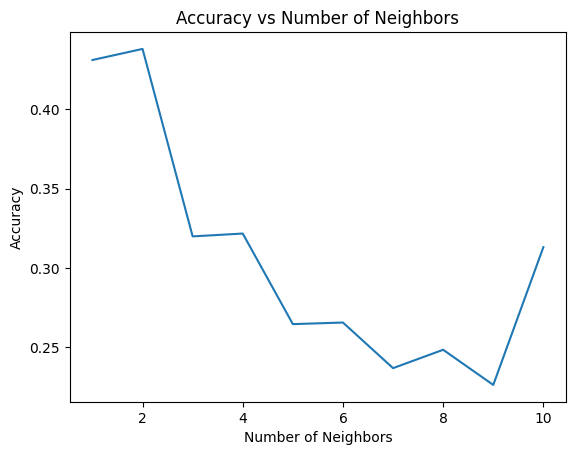

In [76]:
newl = []
for i in range(1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  newl.append(newneigh.score(X_test,Y_test))
plt.plot(range(1,11),newl)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')